# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [21]:
#Creating a dataframe so I can store the API data

city_dataframe=pd.DataFrame(cities)
city_dataframe.head()


,0
0,pisco
1,rikitea
2,arraial do cabo
3,busselton
4,avarua


In [22]:
#Changing the column 0 to City
city_dataframe=city_dataframe.rename(columns={0: "City"})
city_dataframe.head()

,City
0,pisco
1,rikitea
2,arraial do cabo
3,busselton
4,avarua


In [23]:
# set up additional columns to hold information
city_dataframe['Cloudiness'] = ""
city_dataframe['Country'] = ""
city_dataframe['Date'] = ""
city_dataframe['Humidity'] = ""
city_dataframe['Lat'] = ""
city_dataframe['Lng'] = ""
city_dataframe['Max Temp'] = ""
city_dataframe['Wind Speed'] = ""

city_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pisco,,,,,,,,
1,rikitea,,,,,,,,
2,arraial do cabo,,,,,,,,
3,busselton,,,,,,,,
4,avarua,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
url = "http://api.openweathermap.org/data/2.5/weather"
api_key="3674ad71a6f2083cd8258e5e84b2eeaa"
params= {"units": "Imperial",
    "appid": "3674ad71a6f2083cd8258e5e84b2eeaa"}

print("Beginning Data Retrieval")
print("-----------------------------")

# use iterrows to iterate through pandas dataframe
for index, row in city_dataframe.iterrows():

    # get city name from dataframe
    city_name = row['City']
    
    # updating url address key value
    params['q'] = city_name

    # assembling url and make API requests
    print(f"Processing Record {index} of {city_name}")
    weather_response = requests.get(url, params=params).json()

    
    try:
        
        city_dataframe.loc[index,'Cloudiness'] = weather_response['clouds']['all']
        city_dataframe.loc[index,'Country'] = weather_response['sys']['country']
        city_dataframe.loc[index,'Date'] = weather_response['dt']
        city_dataframe.loc[index,'Humidity'] = weather_response['main']['humidity']
        city_dataframe.loc[index,'Lat'] = weather_response['coord']['lat']
        city_dataframe.loc[index,'Lng'] = weather_response['coord']['lon']
        city_dataframe.loc[index,'Max Temp'] = weather_response['main']['temp_max']
        city_dataframe.loc[index,'Wind Speed'] = weather_response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")





Beginning Data Retrieval
-----------------------------
Processing Record 0 of pisco
Processing Record 1 of rikitea
Processing Record 2 of arraial do cabo
Processing Record 3 of busselton
Processing Record 4 of avarua
Processing Record 5 of rogun
City not found. Skipping...
Processing Record 6 of hermanus
Processing Record 7 of kodiak
Processing Record 8 of laguna
Processing Record 9 of coquimbo
Processing Record 10 of attawapiskat
City not found. Skipping...
Processing Record 11 of provideniya
Processing Record 12 of hobart
Processing Record 13 of atuona
Processing Record 14 of cape town
Processing Record 15 of talnakh
Processing Record 16 of kieta
Processing Record 17 of tsihombe
City not found. Skipping...
Processing Record 18 of bluff
Processing Record 19 of khatanga
Processing Record 20 of senno
Processing Record 21 of evensk
Processing Record 22 of villa guerrero
Processing Record 23 of albany
Processing Record 24 of jamestown
Processing Record 25 of mahebourg
Processing Record 26

Processing Record 222 of tabialan
City not found. Skipping...
Processing Record 223 of nanortalik
Processing Record 224 of coihaique
Processing Record 225 of tautira
Processing Record 226 of kaitangata
Processing Record 227 of skalistyy
City not found. Skipping...
Processing Record 228 of buchanan
Processing Record 229 of kuldur
Processing Record 230 of ponta delgada
Processing Record 231 of coolum beach
Processing Record 232 of castro
Processing Record 233 of becerril
Processing Record 234 of tevaitoa
Processing Record 235 of atherton
Processing Record 236 of carballo
Processing Record 237 of palabuhanratu
City not found. Skipping...
Processing Record 238 of bethel
Processing Record 239 of paita
Processing Record 240 of avera
Processing Record 241 of quatre cocos
Processing Record 242 of aberdeen
Processing Record 243 of ambon
Processing Record 244 of broken hill
Processing Record 245 of moyale
Processing Record 246 of tailai
Processing Record 247 of camacha
Processing Record 248 of t

Processing Record 442 of sapa
Processing Record 443 of morondava
Processing Record 444 of mancio lima
City not found. Skipping...
Processing Record 445 of umzimvubu
City not found. Skipping...
Processing Record 446 of soroti
Processing Record 447 of mogadishu
Processing Record 448 of brae
Processing Record 449 of sitka
Processing Record 450 of hobyo
Processing Record 451 of shakawe
Processing Record 452 of olafsvik
City not found. Skipping...
Processing Record 453 of broome
Processing Record 454 of saint-leu
Processing Record 455 of jawhar
Processing Record 456 of chipata
Processing Record 457 of olovyannaya
Processing Record 458 of cockburn town
Processing Record 459 of green river
Processing Record 460 of raghogarh
Processing Record 461 of phrai bung
City not found. Skipping...
Processing Record 462 of puerto escondido
Processing Record 463 of plouzane
Processing Record 464 of severnyy
City not found. Skipping...
Processing Record 465 of nikki
Processing Record 466 of pimenta bueno
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Saving it into csv
city_dataframe.to_csv("weatherdatahwassignment.py.csv")

In [9]:
city_dataframe.count()

City          607
Cloudiness    607
Country       607
Date          607
Humidity      607
Lat           607
Lng           607
Max Temp      607
Wind Speed    607
dtype: int64

In [10]:
#Dataframe Display
city_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mar del plata,44,AR,1544918820,37,-46.43,-67.52,72.69,32.01
1,kazalinsk,,,,,,,,
2,east london,88,ZA,1544918907,100,-33.02,27.91,71.34,7.74
3,cape town,0,ZA,1544914800,72,-33.93,18.42,68,8.05
4,bambous virieux,40,MU,1544914800,78,-20.34,57.76,77,14.99


In [11]:
#Check data types
city_dataframe.dtypes

City          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lng           object
Max Temp      object
Wind Speed    object
dtype: object

In [12]:
# Conversion of objects to floats for the plots
city_dataframe['Cloudiness'] = pd.to_numeric(city_dataframe['Cloudiness'])
city_dataframe['Humidity'] = pd.to_numeric(city_dataframe['Humidity'])
city_dataframe['Lat'] = pd.to_numeric(city_dataframe['Lat'])
city_dataframe['Max Temp'] = pd.to_numeric(city_dataframe['Max Temp'])
city_dataframe['Wind Speed'] = pd.to_numeric(city_dataframe['Wind Speed'])

In [13]:
# Check data types
city_dataframe.dtypes

City           object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng            object
Max Temp      float64
Wind Speed    float64
dtype: object

In [14]:
#Dataframe Display
city_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mar del plata,44.0,AR,1544918820,37.0,-46.43,-67.52,72.69,32.01
1,kazalinsk,NaN,,,NaN,NaN,,NaN,NaN
2,east london,88.0,ZA,1544918907,100.0,-33.02,27.91,71.34,7.74
3,cape town,0.0,ZA,1544914800,72.0,-33.93,18.42,68.00,8.05
4,bambous virieux,40.0,MU,1544914800,78.0,-20.34,57.76,77.00,14.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

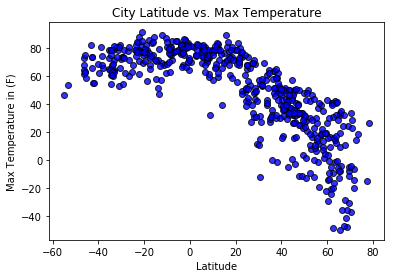

In [15]:
#Build a scatter plot for each data type
plt.scatter(city_dataframe["Lat"], city_dataframe["Max Temp"], marker="o", facecolors="blue",edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in (F)")



# Save the figure
plt.savefig("fig1")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

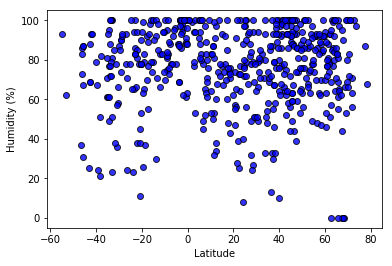

In [16]:
# Build a scatter plot for each data type
plt.scatter(city_dataframe["Lat"], city_dataframe["Humidity"], marker="o", facecolors="blue",edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
title = ("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("fig2")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

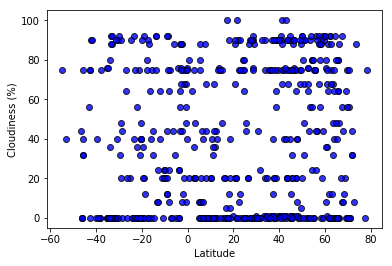

In [17]:
# Build a scatter plot for each data type
plt.scatter(city_dataframe["Lat"], city_dataframe["Cloudiness"], marker="o", facecolors="blue",edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
title = ("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("fig3")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

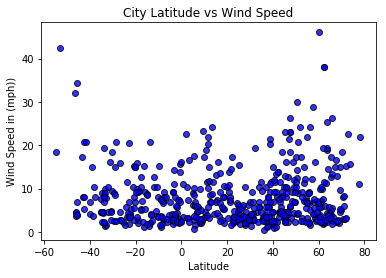

In [18]:
# Build a scatter plot for each data type
plt.scatter(city_dataframe["Lat"], city_dataframe["Wind Speed"], marker="o", facecolors="blue",edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
title = ("City Latitude vs Wind Speed")
plt.title(title)
plt.ylabel("Wind Speed in (mph))")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("fig4")

# Show plot
plt.show()